# Project: Predict survival on the Titanic

## Exploratory Data Analysis
The following steps are best tackled with pandas functions. If you prefer, you can also use basic Python commands.

### Step 1
- Read the file train.csv into Python and print a few rows.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', index_col=0)

In [3]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Step 2
- Write a program that calculates the number of surviving passengers and prints it to the screen.
- Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [6]:
survive_or_die = df['Survived'].value_counts()
survive_or_die

0    549
1    342
Name: Survived, dtype: int64

In [7]:
print(f'Number of surviving passengers: {df["Survived"].sum()}')

Number of surviving passengers: 342


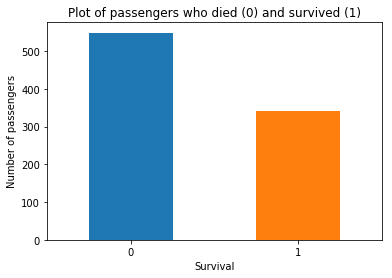

In [8]:
survive_or_die.plot.bar()
plt.xlabel('Survival')
plt.xticks(rotation=0)
plt.ylabel('Number of passengers')
plt.title('Plot of passengers who died (0) and survived (1)')
plt.show()

### Step 3
- Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [9]:
df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [10]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [11]:
df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [12]:
survived_1st = df.groupby('Pclass')['Survived'].value_counts()[1] / df.groupby('Pclass')['Survived'].count()[1] * 100

In [13]:
survived_1st = pd.DataFrame(survived_1st)
survived_1st

,Survived
Survived,
1,62.962963
0,37.037037


In [14]:
df2 = pd.DataFrame(df.groupby('Pclass')['Survived'].value_counts())

In [15]:
df2 = df2.stack().unstack(2)
df2

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

##### Can do this for 2nd and 3rd class too:

In [16]:
survived_2nd = df.groupby('Pclass')['Survived'].value_counts()[2] / df.groupby('Pclass')['Survived'].count()[2] * 100
survived_2nd

Survived
0    52.717391
1    47.282609
Name: Survived, dtype: float64

In [17]:
survived_3rd = df.groupby('Pclass')['Survived'].value_counts()[3] / df.groupby('Pclass')['Survived'].count()[3] * 100
survived_3rd

Survived
0    75.763747
1    24.236253
Name: Survived, dtype: float64

**There is a 47.3% chance of surviving the Titanic if you are travelling in 2nd class, and a 24.2% chance of surviving if you are travelling in 3rd class!**

### Step 4

- Create a bar plot with separate bars for male/female passengers 

In [18]:
male_female = df.groupby('Sex')['Survived'].value_counts()
male_female

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

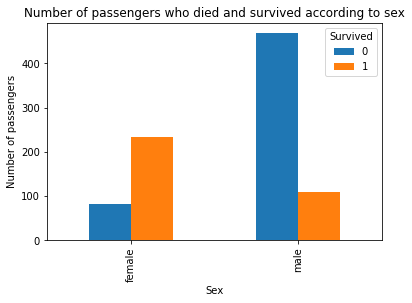

In [19]:
male_female.unstack(1).plot.bar()
plt.xlabel("Sex")
plt.ylabel("Number of passengers")
plt.title("Number of passengers who died and survived according to sex")
plt.show()

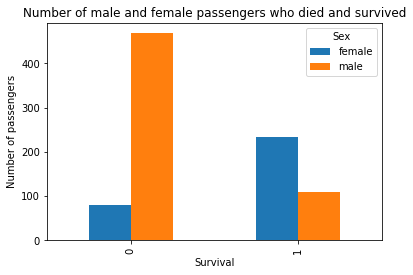

In [20]:
male_female.unstack(0).plot.bar()
plt.xlabel("Survival")
plt.ylabel("Number of passengers")
plt.title("Number of male and female passengers who died and survived")
plt.show()

- Create a bar plot with separate bars for 1st/2nd/3rd class passengers.

In [21]:
first_second_third = df.groupby('Pclass')['Survived'].value_counts().unstack(1)

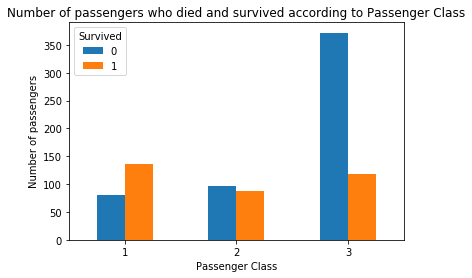

In [22]:
first_second_third.plot.bar()
plt.xlabel("Passenger Class")
plt.xticks(rotation=0)
plt.ylabel("Number of passengers")
plt.title("Number of passengers who died and survived according to Passenger Class")
plt.show()

### Step 5
- Calculate the average age for all passengers. Discard passengers with missing age.
- Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

In [23]:
print(f"Average age for all passengers: {round(df['Age'].dropna().mean(),1)}")

Average age for all passengers: 29.7


In [24]:
hist_all_pass = df['Age'].dropna()

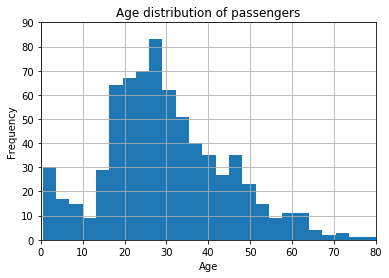

In [25]:
hist_all_pass.hist(bins=25, histtype = 'bar')
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0,80,0,90]) # First 2 numbers are for x-axis, 2nd bunch of numbers are for y-axis
plt.show()

In [26]:
df_died = df[df['Survived'] == 0]
df_died = df_died['Age'].dropna()

In [27]:
df_survived = df[df['Survived'] == 1]
df_survived = df_survived['Age'].dropna()

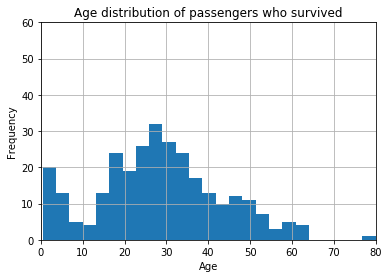

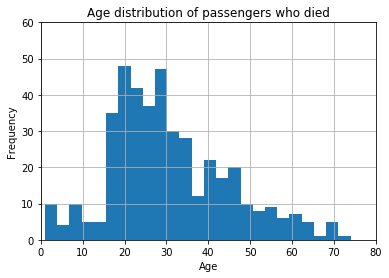

In [28]:
df_survived.hist(bins=25)
plt.title('Age distribution of passengers who survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0,80,0,60])
plt.show()

df_died.hist(bins=25)
plt.title('Age distribution of passengers who died')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0,80,0,60])

plt.show()

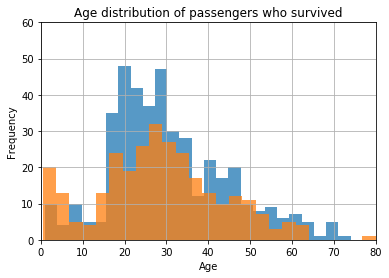

In [29]:
df_died.hist(bins=25, alpha=0.75)
df_survived.hist(bins=25, alpha=0.75)

plt.title('Age distribution of passengers who survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0,80,0,60]) # First 2 numbers are for x-axis, 3rd and 4th numbers are for y-axis
plt.show()

### Step 6
- Calculate the average age for survived and drowned passengers separately.


In [30]:
passenger_sums = df.groupby('Survived')['Age'].sum()
pd.DataFrame(passenger_sums).rename(columns= {'Age': 'Total age of all dead and survived passengers'})

,Total age of all dead and survived passengers
Survived,
0,12985.50
1,8219.67


In [31]:
passenger_count = df.groupby('Survived')['Age'].count()
pd.DataFrame(passenger_count).rename(columns= {'Age':'Count'})

,Count
Survived,
0,424
1,290


In [32]:
age_drowned = passenger_sums[0]/passenger_count[0]
print(f'Average age of passengers who drowned: {round(age_drowned, 1)}')

Average age of passengers who drowned: 30.6


In [33]:
age_survived = passenger_sums[1]/passenger_count[1]
print(f'Average age of passengers who survived: {round(age_survived, 1)}')

Average age of passengers who survived: 28.3


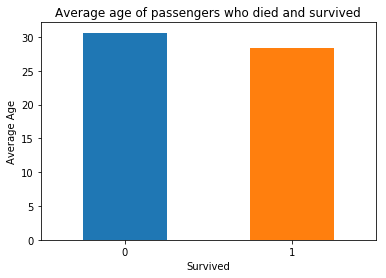

In [34]:
df.groupby('Survived')['Age'].mean().plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Average Age")
plt.title("Average age of passengers who died and survived")
plt.show()

### Step 7
- Replace missing age values by the mean age.

In [35]:
age_mean = round(df['Age'].mean(), 1)

In [36]:
age_mean

29.7

In [37]:
df2 = df.fillna(age_mean)

In [38]:
df2['Age'].mean()

29.69929292929302

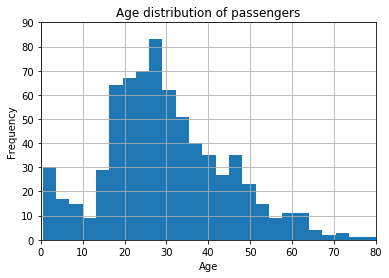

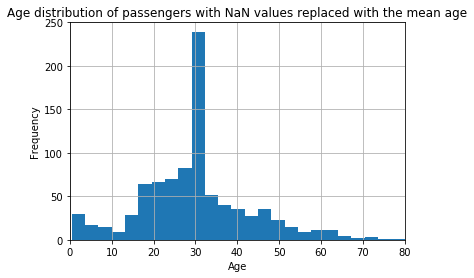

In [39]:
hist_all_pass.hist(bins=25, histtype = 'bar')
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0,80,0,90]) 
plt.show()

df2['Age'].hist(bins=25)
plt.title('Age distribution of passengers with NaN values replaced with the mean age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axis([0,80,0,250])
plt.show()

### Step 8
- Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [40]:
male_female = df.groupby('Sex')['Survived'].value_counts().unstack(0)
male_female = male_female.reset_index()
male_female

Sex,Survived,female,male
0,0,81,468
1,1,233,109


In [41]:
first_second_third = df.groupby('Pclass')['Survived'].value_counts().unstack(0)
first_second_third = first_second_third.reset_index()
first_second_third

Pclass,Survived,1,2,3
0,0,80,97,372
1,1,136,87,119


In [42]:
merged = male_female.merge(first_second_third, on=male_female.index, how='left',
                           suffixes=('','_2')).drop('key_0', axis=1)
table = merged.drop(columns='Survived_2').set_index('Survived')
table

,female,male,1,2,3
Survived,,,,,
0,81,468,80,97,372
1,233,109,136,87,119


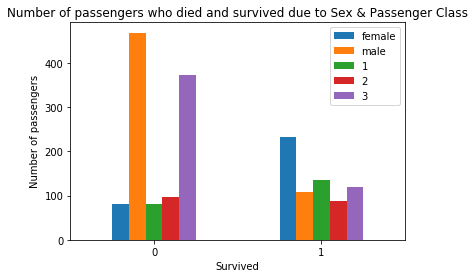

In [43]:
table.plot.bar()
plt.xticks(rotation=0)
plt.ylabel("Number of passengers")
plt.title("Number of passengers who died and survived due to Sex & Passenger Class")
plt.show()

### Additional Exploratory Data Analysis

In [44]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarking Point

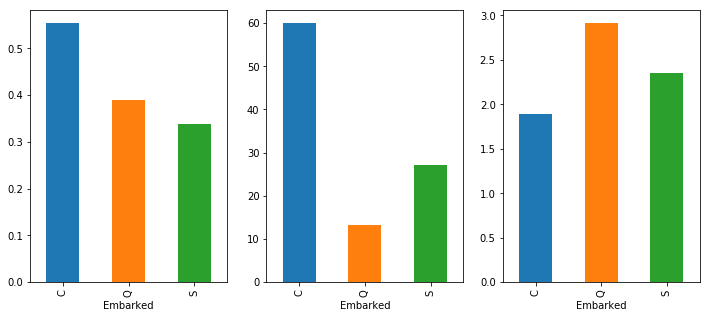

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

df.groupby("Embarked")['Survived'].mean().plot.bar(ax=axes[0])
df.groupby("Embarked")['Fare'].mean().plot.bar(ax=axes[1])
df.groupby("Embarked")['Pclass'].mean().plot.bar(ax=axes[2])

plt.show()

#### People who embarked at Cherbourg had a greater chance of survival than those who boarded at Queenstown, who in turn had more chance than those boarding at Southampton.

#### Those who boarded at Cherbourg also had higher fares than those who boarded at Southampton and Queenstown.

#### Predictably, from the average fare paid, most of the passengers who embarked at Queenstown were 3rd class, but surprisingly they were more likely to survive than the passengers who boarded at Southampton, who were travelling predominantly in 2nd (and 3rd) class, but this is probably down to their being a greater amount of 3rd class passengers aboard the ship in general.

### Sex

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

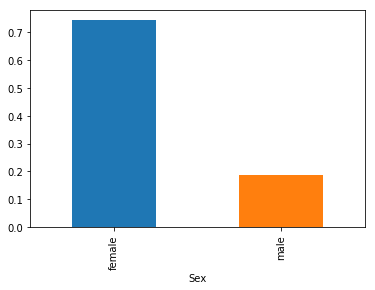

In [46]:
df.groupby('Sex')['Survived'].mean().plot.bar()
df.groupby('Sex')['Survived'].value_counts()

#### Far more men boarded than women (almost double), and yet the number of women who survived is far greater than the number of men (more than double) - 4/5 of men died, compared to just 1/4 of women!

### Passenger Class and Sex

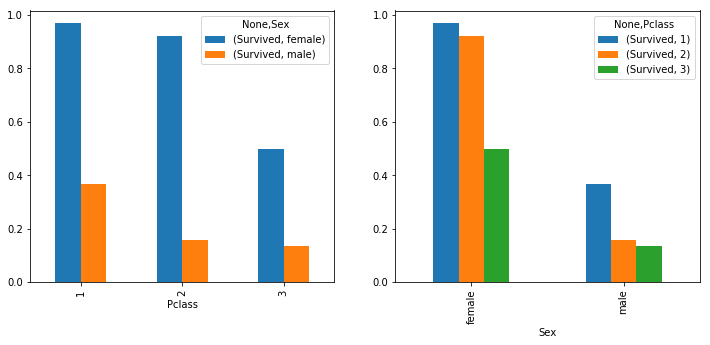

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

df.groupby(['Pclass', 'Sex'])[['Survived']].mean().unstack(1).plot.bar(ax=axes[0])
df.groupby(['Pclass', 'Sex'])[['Survived']].mean().unstack(0).plot.bar(ax=axes[1])
plt.show()

#### This demonstrates that being female is the greatest indicator for survival, in order of 1st, 2nd and then 3rd class. The men who survived were overwhelmingly from 1st class, whilst there is a slight advantage in being 2nd class in comparison to 3rd.

### Fare and Passenger Class

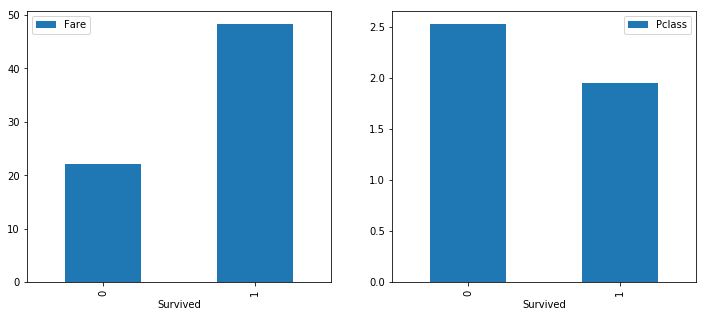

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

df.groupby(['Survived'])[['Fare']].mean().plot.bar(ax=axes[0])
df.groupby(['Survived'])[['Pclass']].mean().plot.bar(ax=axes[1])

### Age

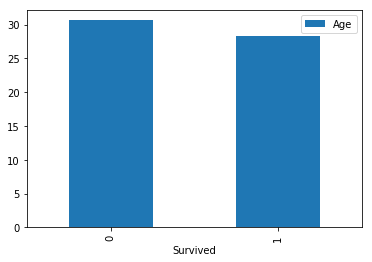

In [49]:
df.groupby(['Survived'])[['Age']].mean().plot.bar()

In [50]:
df3 = df.copy()

In [51]:
df3['Age Bin'] = pd.cut(df['Age'], 30)
df3['Age Bin QCUT'] = pd.qcut(df['Age'], 20)

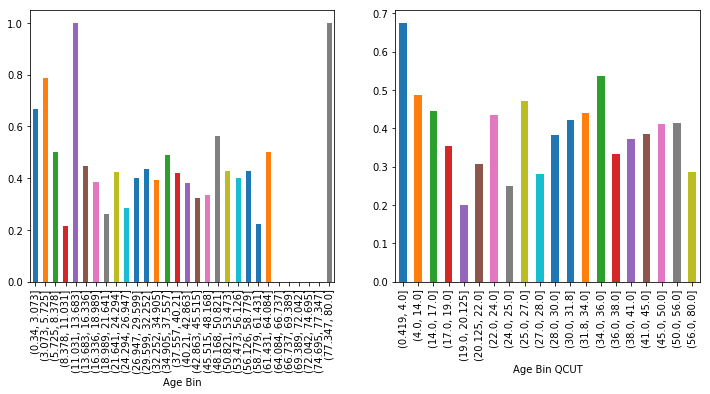

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

df3.groupby('Age Bin')['Survived'].mean().plot.bar(ax=axes[0])
df3.groupby('Age Bin QCUT')['Survived'].mean().plot.bar(ax=axes[1])

#### And after filling NaN values with the mean:

In [53]:
df2['Age Bin'] = pd.cut(df['Age'], 30)
df2['Age Bin QCUT'] = pd.qcut(df['Age'], 20)

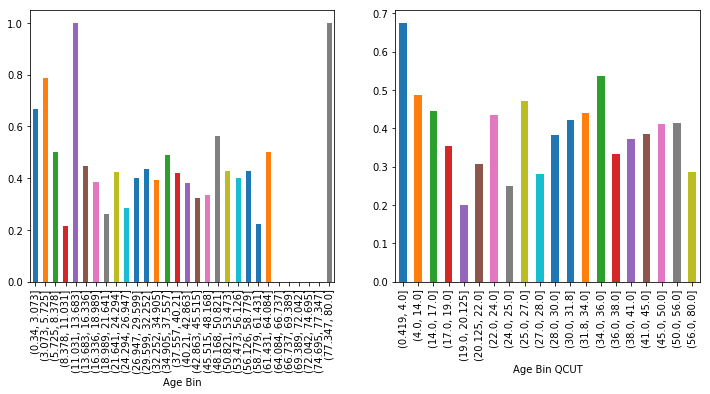

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

df2.groupby('Age Bin')['Survived'].mean().plot.bar(ax=axes[0])
df2.groupby('Age Bin QCUT')['Survived'].mean().plot.bar(ax=axes[1])

### Fare

In [55]:
df2['Fare Bin'] = pd.cut(df['Fare'], 30)
df2['Fare Bin QCUT'] = pd.qcut(df['Fare'], 30)

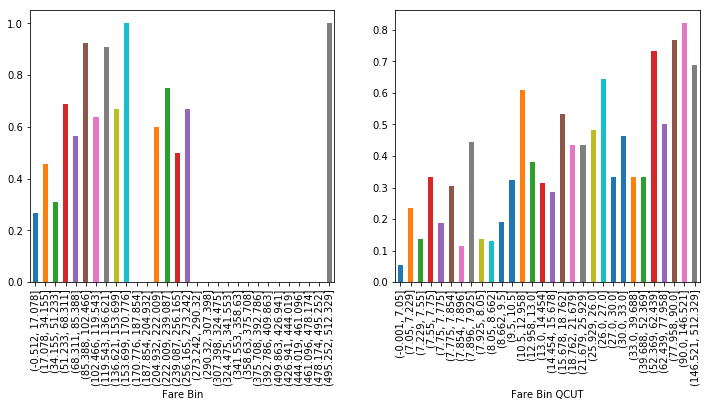

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

df2.groupby('Fare Bin')['Survived'].mean().plot.bar(ax=axes[0])
df2.groupby('Fare Bin QCUT')['Survived'].mean().plot.bar(ax=axes[1])

### Parents & Children, Siblings & Spouses, & Family

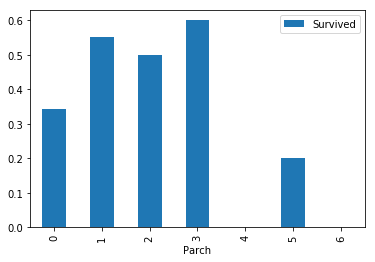

In [57]:
df.groupby(['Parch'])[['Survived']].mean().plot.bar()

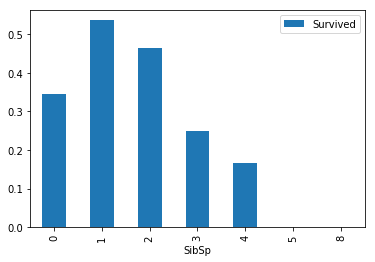

In [58]:
df.groupby(['SibSp'])[['Survived']].mean().plot.bar()

In [59]:
df['Family'] = df['Parch'] + df['SibSp']

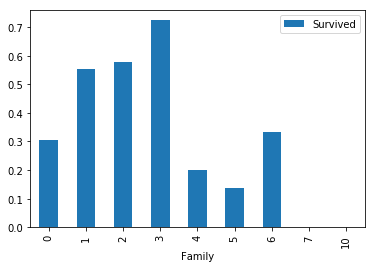

In [60]:
df.groupby('Family')[['Survived']].mean().plot.bar()

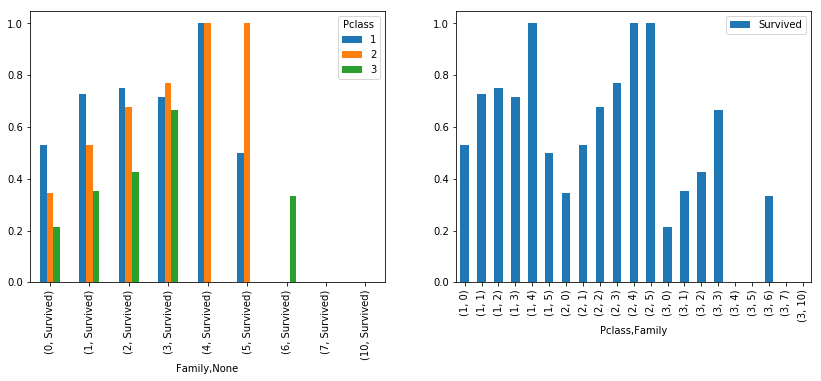

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

df.groupby(['Pclass', 'Family'])[['Survived']].mean().stack().unstack(0).plot.bar(ax=axes[0])
df.groupby(['Pclass', 'Family'])[['Survived']].mean().plot.bar(ax=axes[1])

### Title
- Could even perform analysis on the likelihood of survival based off your title!
- e.g. we would expect people with the title of Mr. to predominantly die as men overwhelmingly died
- Conversely, Master. would survive as they may be of the male sex but they are in fact children! Mrs. and Ms. expected to survive as well as of female sex.
- Is title of Dr. a good indicator for survival? They are all men on board, but probably 1st class travelling so that would work in their favour too.
- Then can search for titles such as Lady, Viscounty, Don, other nobility etc - would expect them to survive as probably in first class!

**The titles can even be used to get a better average age for the passengers! e.g. the average age of people with the title Master. is 4.6, and the title Miss. it is 21.8 before including the average age, both of which are far below 29.7! In turn this would increase the average age for people with the title Mr., Mrs., etc** 

In [62]:
print(f"Number of 'Mr.' passengers who survived: {df[df['Name'].str.contains('Mr.', regex=False)]['Survived'].sum()}")

Number of 'Mr.' passengers who survived: 81


In [63]:
print(f"Number of 'Mr.' passengers in total: {len(df[df['Name'].str.contains('Mr.', regex=False)])}")

Number of 'Mr.' passengers in total: 517


In [64]:
print(f"Number of 'Mrs.' passengers who survived: {df[df['Name'].str.contains('Mrs.', regex=False)]['Survived'].sum()}")

Number of 'Mrs.' passengers who survived: 99


In [65]:
print(f"Number of 'Mrs.' passengers in total: {len(df[df['Name'].str.contains('Mrs.', regex=False)])}")

Number of 'Mrs.' passengers in total: 125


In [66]:
df[df['Name'].str.contains('Dr.', regex=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,,
246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,2
318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,0
399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,0
633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,0
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,2
767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,0
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,0


In [67]:
print(f"Number of 'Miss.' passengers who survived: {df[df['Name'].str.contains('Miss.')]['Survived'].sum()}")

Number of 'Miss.' passengers who survived: 127


In [68]:
print(f"Number of 'Miss.' passengers in total: {len(df[df['Name'].str.contains('Miss.')])}")

Number of 'Miss.' passengers in total: 182


In [69]:
print(f"Average age of 'Miss.' passengers: {round(df[df['Name'].str.contains('Miss.')]['Age'].mean(),1)}")

Average age of 'Miss.' passengers: 21.8


In [70]:
print(f"Number of 'Miss.' passengers who survived: {df[df['Name'].str.contains('Master.')]['Survived'].sum()}")

Number of 'Miss.' passengers who survived: 23


In [71]:
print(f"Number of 'Master.' passengers in total: {len(df[df['Name'].str.contains('Master.')])}")

Number of 'Master.' passengers in total: 40


In [72]:
print(f"Average age of 'Miss.' passengers: {round(df[df['Name'].str.contains('Master.')]['Age'].mean(),1)}")

Average age of 'Miss.' passengers: 4.6


### Correlation Matrix

In [73]:
import seaborn as sns

In [74]:
corr_matrix = df.drop(columns=['Ticket', 'Cabin', 'Name'])

In [75]:
corr_matrix.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


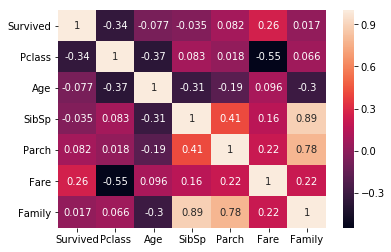

In [76]:
sns.heatmap(corr_matrix.corr(), annot=True)

## Feature Engineering
- **easy**: scale the data - scale your numerical quantities - e.g. Age, Fare
- **medium**: apply one-hot encoding (pd.get_dummies) - do that on categorical data e.g. Sex, Embarked 
- **hard**: create combined and polynomial features

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [78]:
df = pd.read_csv('train.csv', index_col=0)
df = df.dropna(subset=['Embarked'])

In [79]:
X = df.drop(['Survived','Cabin','Ticket','Name'], axis=1)
y = df['Survived']

In [80]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.25,S


In [81]:
minmax = MinMaxScaler()

def feature_engineering(df, mean_age):
    
    #to remove errors
    df = df.copy()
    
    # fill in the missing NaN age values
    df['Age'].fillna(mean_age, inplace=True)
    
    # scale the data - Age and Fare 
    df['Age_Scaled'] = minmax.fit_transform(df[['Age']])
    df['Fare_Scaled'] = minmax.fit_transform(df[['Fare']])
    
#     #Group Fares into bins - we can compare which of binning/scaling is more effective!
#     df_stats = df.describe()
#     max_fare = int(df_stats.loc['max']['Fare'])
#     min_fare = int(df_stats.loc['min']['Fare'])
#     fare_bins = ["{0} - {1}".format(i, i + 49) for i in range(min_fare, max_fare, 50)]
    
#     df['Fare_Bin'] = pd.cut(df['Fare'], len(fare_bins), 
#                             right=False, labels=fare_bins)

#     #do the same for Age
#     max_age = int(df_stats.loc['max']['Age'])
#     min_age = int(df_stats.loc['min']['Age'])
#     age_bins = ["{0} - {1}".format(i, i + 9) for i in range(min_age, max_age, 10)]
    
#     df['Age_Bin'] = pd.cut(df['Age'], len(age_bins),
#                            right=False, labels=age_bins)
    
    # One-hot encoding - Sex 
    df['Female'] = pd.factorize(df['Sex'])[0]
    
    # One-hot encoding - categorize origin port into numbers
    df['Origin_Port'] = pd.factorize(df['Embarked'], sort=True)[0]
    
    # Add SibSp and Parch together - create new column to separate by family size 
    # (i.e. whether size of family on board is less than or equal to 4 persons)
    df['Family'] = df['SibSp'] + df['Parch']
    df['FamSize_LessThan4'] = df['Family'].apply(lambda x: 1 if x <=4 else 0)
    
    #create new column if person is greater than 70 yrs old
    df['Age_olderThan70'] = df['Age'].apply(lambda x: 1 if x >=70 else 0)
    
    # this does a comparison and gives us a binary 0 or 1 if they are a child or not
    df['Child'] = (df['Age'] < 16).astype(int)

    # Gives numbers for 
    df['Female_pclass'] = df['Female']       * df['Pclass']
    df['Male_pclass']   = (1 - df['Female']) * df['Pclass']
    df['Child_pclass']  = df['Child']        * df['Pclass']
    df['Adult_pclass']  = (1 - df['Child'])  * df['Pclass']
    
    # drop columns that are no longer useful
    df.drop(columns=['Age','Fare','Sex', 'Embarked'], inplace=True)
    df.drop(columns=['Parch','SibSp', 'Child'], inplace=True)
#     df.drop(columns=[''], inplace=True)
    
    return df

In [82]:
age_mean = X['Age'].mean()
# train_mean = X_train['Age'].mean()
# test_mean = X_test['Age'].mean()
# use training mean to avoid 'data leakage' in .mean()

X = feature_engineering(X, age_mean)
# X_train = feature_engineering(X_train, train_mean)
# X_test = feature_engineering(X_test, test_mean)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((666, 12), (223, 12), (666,), (223,))

In [84]:
X_train.corr()

,Pclass,Age_Scaled,Fare_Scaled,Female,Origin_Port,Family,FamSize_LessThan4,Age_olderThan70,Female_pclass,Male_pclass,Child_pclass,Adult_pclass
Pclass,1.000000,-0.359183,-0.548642,-0.125773,0.174590,0.061368,-0.141963,-0.051896,0.157634,0.505600,0.175001,0.674374
Age_Scaled,-0.359183,1.000000,0.098979,-0.063401,-0.040000,-0.262493,0.223042,0.297977,-0.149698,-0.100281,-0.558715,0.129651
Fare_Scaled,-0.548642,0.098979,1.000000,0.201034,-0.224532,0.236376,-0.145035,-0.005436,-0.024279,-0.331742,-0.028513,-0.420612
Female,-0.125773,-0.063401,0.201034,1.000000,-0.104604,0.210052,-0.042803,-0.069711,0.895010,-0.862875,0.078730,-0.160369
Origin_Port,0.174590,-0.040000,-0.224532,-0.104604,1.000000,0.073239,-0.108347,-0.043485,-0.036723,0.144403,-0.027088,0.160968
Family,0.061368,-0.262493,0.236376,0.210052,0.073239,1.000000,-0.784020,-0.034557,0.234184,-0.165125,0.452091,-0.289612
FamSize_LessThan4,-0.141963,0.223042,-0.145035,-0.042803,-0.108347,-0.784020,1.000000,0.023125,-0.093696,-0.009467,-0.451917,0.224552
Age_olderThan70,-0.051896,0.297977,-0.005436,-0.069711,-0.043485,-0.034557,0.023125,1.000000,-0.062392,0.021126,-0.029610,-0.019602
Female_pclass,0.157634,-0.149698,-0.024279,0.895010,-0.036723,0.234184,-0.093696,-0.062392,1.000000,-0.772282,0.149080,0.015188
Male_pclass,0.505600,-0.100281,-0.331742,-0.862875,0.144403,-0.165125,-0.009467,0.021126,-0.772282,1.000000,-0.017668,0.420570


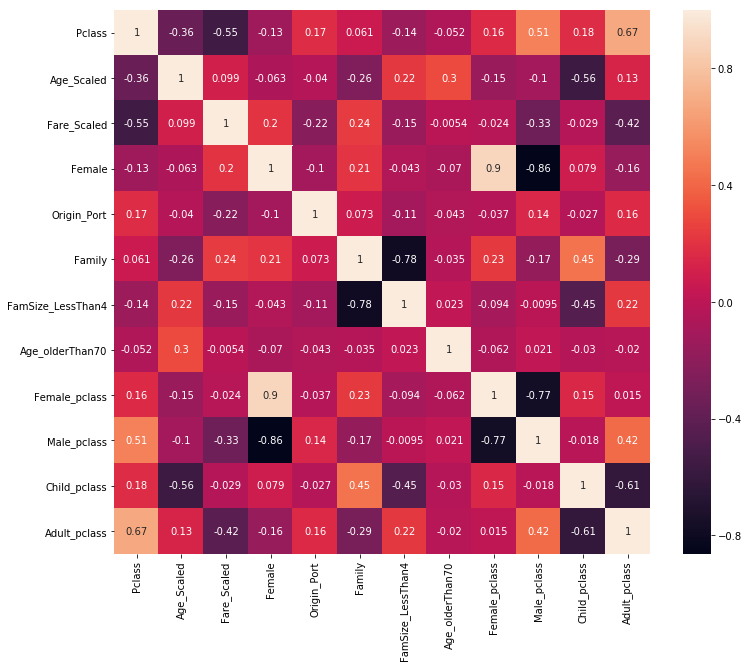

In [85]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

#### As we can see here, we have a few factors that are very closely related to one another, and therefore should probably be removed to prevent overfitting on the model
- Family and SibSp and Parch are very closely related, probably only need Family. Also related to FamSize_LessThan4 so probably remove Family too!
- Pclass closely related to Adult_pclass obviously
- Female, Female_pclass and Male_pclass also obviously related, so should probably remove Female!
- Child and Child_Pclass far too close in relation too!

**Let's see what we get from a Logistic Regression first and then make the changes!**

## Build a Logistic Regression model
- **easy**: use the Logistic Regression in scikit
- **medium**: inspect the coefficients of input features
- **hard**: use the Logistic Regression in statsmodels and understand the output

## Evaluate your model
- **easy**: calculate an accuracy
- **medium**: calculate precision and recall
- **hard**: draw an ROC curve or precision-recall plot

## Validate your model
- **easy**: split your dataset in training and test data
- **medium**: do a cross-validation
- **hard**: calculate a confidence interval with bootstrapping

In [86]:
X_train.head(1)

,Pclass,Age_Scaled,Fare_Scaled,Female,Origin_Port,Family,FamSize_LessThan4,Age_olderThan70,Female_pclass,Male_pclass,Child_pclass,Adult_pclass
PassengerId,,,,,,,,,,,,
760,1,0.409399,0.168837,1,2,0,1,0,1,0,0,1


In [88]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f"train score: {lr.score(X_train, y_train)}")
print(f"test score: {lr.score(X_test, y_test)}")

train score: 0.8243243243243243
test score: 0.820627802690583


#### Logistic Regression Optimisation

In [90]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr = LogisticRegression()

lr_grid = GridSearchCV(lr, grid, cv=10)
lr_grid.fit(X_train,y_train)

print("tuned hyperparameters (best parameters): ",lr_grid.best_params_)
print("accuracy :",lr_grid.best_score_)

tuned hyperparameters (best parameters):  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.8093093093093093


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [92]:
lr_final = lr_grid.best_estimator_
lr_final.fit(X_train, y_train)
lr_final.score(X_train, y_train)

0.8138138138138138

In [93]:
lr_final.score(X_test, y_test)

0.820627802690583

### Calculate an accuracy, precision and recall. Perform a Cross-Validation.


In [94]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

accuracy = cross_val_score(m, X_train, y_train, cv=5, scoring='accuracy')
print(accuracy)
print(f"\nAccuracy score: {accuracy.mean()}, Accuracy std: {accuracy.std()}\n")

precision = cross_val_score(m, X_train, y_train, cv=5, scoring='precision')
print(f"Precision score: {precision.mean()}, Precision std: {precision.std()}\n")

recall = cross_val_score(m, X_train, y_train, cv=5, scoring='recall')
print(f"Precision score: {recall.mean()}, Precision std: {recall.std()}")

[0.81343284 0.7593985  0.79699248 0.76691729 0.81954887]

Accuracy score: 0.7912579957356076, Accuracy std: 0.02421767558123625

Precision score: 0.815208742899166, Precision std: 0.09430170445967043

Precision score: 0.6235294117647059, Precision std: 0.12610145247696883


### Precision and Recall
- A trade off between exactness and totalness
    - High Precision = more exact - more relevant than irrelevant results returned (at the expense of missing some relevant ones)
    - Also called False Positive Rate - it is high when false positives are low

**Precision is the ability of a classifier to not label a true negative as positive!**
    
    - High Recall = totalness - most of the relevant results returned (at the expense of including bad results)
    - Also called True Positive Rate - High when false negatives are low 

**Recall is the ability of the classifier to find positive examples. If we wanted to be certain to find all positive examples, we could maximise recall!**


i.e. Precision - exact - If it's exact, it means it doesn't make many mistakes! 

i.e. Recall - totalness - makes sure False negatives are low - it predicts it's false but it's actually True!

### Draw an ROC curve or precision-recall plot
- ROC shows the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 
- Put another way, plot recall on the x-axis, and precision on the y-axis


- The AUC function takes both the true outcomes (0, 1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0
- **The AUC evaluates the overall quality of the model!**
- We basically want as much under the curve as possible! So the higher the AUC the better!


In [95]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [96]:
ypred = m.predict(X)

In [97]:
roc_auc_score(y, ypred)

0.7999089253187612

In [98]:
fpr, tpr, thresholds = roc_curve(y, ypred)

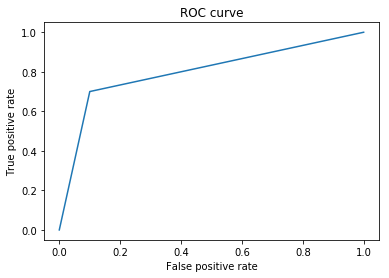

In [99]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [100]:
print(f'Area Under Curve: {round(auc(fpr, tpr)*100, 2)}%')

Area Under Curve: 79.99%


###  Inspect the coefficients of input features

In [101]:
for i in range(12):    
    print(f'{X.columns[i]} Coefficient, a{i}: {m.coef_[0][i]}')
    
print(f"\nIntercept, b : {m.intercept_[0]}")
print(f"train score : {m.score(X_train, y_train)}")
print(f"test score : {m.score(X_test, y_test)}")

Pclass Coefficient, a0: -0.44986442098056484
Age_Scaled Coefficient, a1: -1.4309991583544173
Fare_Scaled Coefficient, a2: 0.35643700408310797
Female Coefficient, a3: 3.6192811806407814
Origin_Port Coefficient, a4: -0.1385204486189241
Family Coefficient, a5: -0.0829512765234102
FamSize_LessThan4 Coefficient, a6: 1.4439090715413778
Age_olderThan70 Coefficient, a7: -0.6513077764806149
Female_pclass Coefficient, a8: -0.46463927175665937
Male_pclass Coefficient, a9: 0.014774850776272913
Child_pclass Coefficient, a10: 0.027377615853609302
Adult_pclass Coefficient, a11: -0.47724203683405586

Intercept, b : -0.06688575616870839
train score : 0.8243243243243243
test score : 0.820627802690583


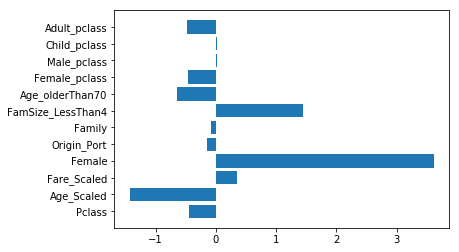

In [102]:
plt.barh(range(12), m.coef_[0])
plt.yticks(range(12), X.columns)
None

### Logistic Regression in Statsmodels 
- understand the output

In [103]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y_train, X_train)
f = logit.fit()
# f = logit.fit(maxiter=300)

print(f.params)
print('-' * 75)
print(f.summary())

         Current function value: 0.418398
         Iterations: 35
Pclass               -0.697177
Age_Scaled           -2.631966
Fare_Scaled           0.157320
Female                6.391744
Origin_Port          -0.183841
Family               -0.067148
FamSize_LessThan4     1.772710
Age_olderThan70     -13.773504
Female_pclass        -1.091546
Male_pclass           0.394368
Child_pclass         -0.138294
Adult_pclass         -0.558883
dtype: float64
---------------------------------------------------------------------------
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  666
Model:                          Logit   Df Residuals:                      656
Method:                           MLE   Df Model:                            9
Date:                Thu, 19 Sep 2019   Pseudo R-squ.:                  0.3713
Time:                        15:38:11   Log-Likelihood:                -278.

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Apply a Random Forest
- **easy**: visualize a decision tree with graphviz
- **medium**: compare a RandomForest and an SVM
- **hard**: implement a RandomForest from scratch

## Tune hyperparameters
- **easy**: execute a Grid Search
- **medium**: execute a Random Search
- **hard**: combine preprocessing and learning into a modeling pipeline
- also optimize the feature engineering part by hyperparameter search


In [104]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf = RandomForestClassifier(n_estimators=4, max_depth=3)
cv_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(cv_score)
print(f'accuracy: {cv_score.mean()}, std: {cv_score.std()}')

[0.7761194  0.7518797  0.81203008 0.78195489 0.86466165]
accuracy: 0.7973291437549096, std: 0.03873411213049999


In [118]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8213213213213213

In [119]:
rf.score(X_test, y_test)

0.7982062780269058

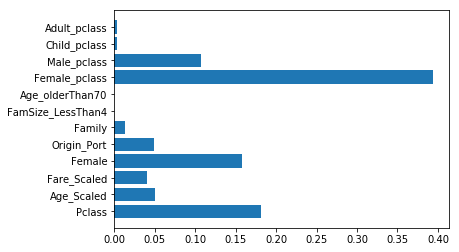

In [123]:
plt.barh(range(12), rf.feature_importances_)
plt.yticks(range(12), X_train.columns)
None

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
param_grid = {'n_estimators': range(1, 21),
              'max_depth': range(1, 21)}

In [128]:
rf_grid = GridSearchCV(rf, param_grid = param_grid)

In [129]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(1, 21), 'max_depth': range(1, 21)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [131]:
rf_grid.best_params_

{'max_depth': 4, 'n_estimators': 4}

In [135]:
rf_final = rf_grid.best_estimator_

In [136]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
rf_final.score(X_train, y_train)

0.8288288288288288

In [138]:
rf_final.score(X_test, y_test)

0.8340807174887892

### SVC

In [139]:
from sklearn.svm import SVC

In [140]:
svc = SVC(kernel='rbf', gamma=0.1, C=0.1)

In [143]:
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))

0.8273273273273273


In [144]:
print(svc.score(X_test, y_test))

0.8385650224215246


#### Hyperparameter optimisation:

In [145]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [146]:
svc_grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

In [147]:
svc_grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ................... C=1000, gamma=1, kernel=linear, total=  12.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   6.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   6.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] ................. C=1000, gamma=0.1, kernel=linear, total=  12.5s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  2.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [148]:
print("tuned hyperparameters (best parameters): ",svc_grid.best_params_)
print("accuracy :",svc_grid.best_score_)

tuned hyperparameters (best parameters):  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.8048048048048048


In [149]:
svc_final = svc_grid.best_estimator_
svc_final.fit(X_train, y_train)
svc_final.score(X_train, y_train)

0.8303303303303303

In [150]:
svc_final.score(X_test, y_test)

0.8340807174887892

## Submit predictions to Kaggle
Submit predictions for new data to the Titanic competition to Kaggle

- easy: reach 70% accuracy
- medium: reach 75% accuracy
- hard: reach 80% accuracy

In [152]:
predict_df = pd.read_csv('predict.csv', index_col=0)

In [154]:
predict_df = predict_df.drop(['Cabin','Ticket','Name'], axis=1)
predict_df['Fare'].fillna(predict_df['Fare'].mean(), inplace=True)

In [155]:
predict_df = feature_engineering(predict_df, age_mean)

In [156]:
predict_df.head(1)

,Pclass,Age_Scaled,Fare_Scaled,Female,Origin_Port,Family,FamSize_LessThan4,Age_olderThan70,Female_pclass,Male_pclass,Child_pclass,Adult_pclass
PassengerId,,,,,,,,,,,,
892,3,0.452723,0.015282,0,1,0,1,0,0,3,0,3


In [160]:
ypred = svc.predict(predict_df)

In [161]:
svc_df = pd.DataFrame(data=ypred, index=predict_df.index, columns = ['Survived'])

In [162]:
svc_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [163]:
svc_df.to_csv('SVC_titanic.csv')

### KAGGLE SCORE SVC: 79.425% 
- m = SVC(kernel='rbf', gamma=0.1, C=0.1)

In [164]:
svc_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [165]:
ypred = svc_final.predict(predict_df)

In [166]:
svc_optimised = pd.DataFrame(data=ypred, index=predict_df.index, columns = ['Survived'])

In [167]:
svc_optimised.to_csv('Optimised_SVC_titanic.csv')

### KAGGLE SCORE OPTIMISED SVC: 78.947% 
- {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [168]:
lr_grid.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [169]:
lr_final.score(X_train, y_train)

0.8138138138138138

In [170]:
lr_final.score(X_test, y_test)

0.820627802690583

In [171]:
ypred = lr_final.predict(predict_df)

In [172]:
logreg_optimised = pd.DataFrame(data=ypred, index=predict_df.index, columns = ['Survived'])

In [173]:
logreg_optimised.to_csv('Optimised_LogReg_titanic.csv')

### KAGGLE SCORE OPTIMISED LOGISTIC REGRESSION: 77.511%
- {'C': 1.0, 'penalty': 'l1'}

In [176]:
rf_grid.best_params_

{'max_depth': 4, 'n_estimators': 4}

In [177]:
rf_final.score(X_train, y_train)

0.8288288288288288

In [178]:
rf_final.score(X_test, y_test)

0.8340807174887892

In [179]:
ypred = rf_final.predict(predict_df)

rf_optimised = pd.DataFrame(data=ypred, index=predict_df.index, columns = ['Survived'])

rf_optimised.to_csv('Optimised_RF_titanic.csv')

### KAGGLE SCORE OPTIMISED RandomForest: 76.555%
- {'max_depth': 5, 'n_estimators': 5}

## Review Questions
- What score would a dummy model that always predicts “does not survive” achieve?
- What is the best training/test score?
- What is your best model?
- How does your best model compare to other models on Kaggle?
- What did other people on Kaggle do to improve their model?